# OLA - Ensemble Learning

## 1. Define Problem Statement
The Problem is to predict **driver churn** for Ola. Churn refer to the likelihood that a driver will leave the company. Factor like age, income, business value, and quarterly rating can contribute to driver attrition. 
Given driver attributes such as age, income, education level, total business value, tenure, and performance ratings, predict whether a driver will leave Ola.
By identifying at-risk drivers, the company can take proactive measures to reduce attrition and improve retention.

#### Column Profiling

1. **MMM-YY**: Reporting Date (Monthly format)  
   - **Type**: `datetime64[ns]`
   - **Description**: Date indicating the monthly reporting period for each driver.

2. **Driver_ID**: Unique identifier for each driver  
   - **Type**: `int64`
   - **Description**: Unique ID assigned to each driver.

3. **Age**: Age of the driver  
   - **Type**: `float64`  
   - **Description**: Driver's age, ranging from 20 to 60.

4. **Gender**: Gender of the driver  
   - **Type**: `category` (0 = Male, 1 = Female)  
   - **Description**: Coded representation of gender. 0 for Male, 1 for Female.

5. **City**: City code of the driver  
   - **Type**: `category`  
   - **Description**: Categorical representation of different cities where drivers operate (e.g., C20, C29, etc.).

6. **Education_Level**: Education level of the driver  
   - **Type**: `category` (0 for 10+, 1 for 12+, 2 for Graduate)  
   - **Description**: Education qualification of drivers.

7. **Income**: Monthly average income of the driver  
   - **Type**: `int64`  
   - **Description**: Driver's monthly income, ranging from ₹20,000 to ₹180,000.

8. **Dateofjoining**: Date when the driver joined the company  
   - **Type**: `datetime64[ns]`  
   - **Description**: The driver’s starting date at the company.

9. **LastWorkingDate**: The driver’s last working date  
   - **Type**: `object` (May need to be converted to `datetime64[ns]`)  
   - **Description**: If the driver has left the company, this column records the last day they worked. If still working, it may say "Still Working."

10. **Joining Designation**: The role the driver had when joining  
    - **Type**: `category`  
    - **Description**: Categorical value representing the designation of drivers at the time of joining.

11. **Grade**: Driver’s grade level at the time of reporting  
    - **Type**: `category`  
    - **Description**: Categorical value representing the driver's grade (likely based on performance, seniority, or region).

12. **Total Business Value**: Total business value acquired by the driver in a month  
    - **Type**: `int64`  
    - **Description**: The monthly business value that each driver generates, which could be negative due to refunds or cancellations.

13. **Quarterly Rating**: Quarterly performance rating of the driver  
    - **Type**: `int64`  
    - **Description**: Driver’s performance rating, from 1 (low) to 5 (high).


In [43]:
# Importing the necessary libraries
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Exploratory Data Analysis (EDA)


In [44]:
# Data overview
df = pd.read_csv('../Data/ola_driver_scaler.csv')
df.head()


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [45]:
# initial check 

# shape of the data
print("Shape of the data : ", df.shape)

# Data types of each column
print(df.dtypes)

# Checking for missing values
print(df.isnull().sum())



Shape of the data :  (19104, 14)
Unnamed: 0                int64
MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object
Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


### Initial Observations:
1. **Shape of Data:**
   1. Rows: 19, 104
   2. Columns: 14
2. **Data Types:** The column types are mostly correct. However:
   *  MMM-YY, Dateofjoining, and LastWorkingDate: These should ideally be in `datetime` format
3. **Unnamed: 0:** This column appears to be an index that was unintentionally red in. It's not necessary, so it can be dropped.
4. **Missing Values:** 
   1. Age : 61 missing values
   2. Gender : 52 missing values
   3. LastWorkingDate : 17,488 missing values 

In [46]:
# remove the unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [47]:
# Convert specific columns to category type
categorical_cols = ['Gender', 'City', 'Education_Level', 'Joining Designation','Grade'] 
df[categorical_cols] = df[categorical_cols].astype('category')

In [48]:
# statistical summary of numerical columns
df.describe()

,Driver_ID,Age,Income,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,65652.025126,5.716621e+05,2.008899
std,810.705321,6.257912,30914.515344,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,3.374772e+07,4.000000


In [49]:
# Convert date columns to datetime format
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format='%d/%m/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format='%d/%m/%y')

# make a copy of dataFrame for KNN imputation
df_copy = df.copy()

In [50]:
# Handling missing values for Age and Gender by imputing median 
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Replace missing 'LastWorkingDate' with a placeholder for 'active' drivers
df['LastWorkingDate'].fillna('Still Working', inplace=True)

In [51]:
# let's check the data overview now after all the missing value handling and type casting
print('After removing the unnecessary columns :\n', df.head())
print('After change the date columns to proper datetime type :\n',df.dtypes)
print('After filling the missing values of the data with proper values :\n',df.isnull().sum())

After removing the unnecessary columns :
       MMM-YY  Driver_ID   Age Gender City Education_Level  Income  \
0 2019-01-01          1  28.0    0.0  C23               2   57387   
1 2019-01-02          1  28.0    0.0  C23               2   57387   
2 2019-01-03          1  28.0    0.0  C23               2   57387   
3 2020-01-11          2  31.0    0.0   C7               2   67016   
4 2020-01-12          2  31.0    0.0   C7               2   67016   

  Dateofjoining      LastWorkingDate Joining Designation Grade  \
0    2018-12-24        Still Working                   1     1   
1    2018-12-24        Still Working                   1     1   
2    2018-12-24  2019-11-03 00:00:00                   1     1   
3    2020-06-11        Still Working                   2     2   
4    2020-06-11        Still Working                   2     2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2             

### Univariate Analysis


* **Continuos Variables**:
    * Age: Examine the distribution and summary statistics
    * Income: Understand income distribution
    * Total Business value: Explore its distribution, particularly since it includes both negative and positive values 

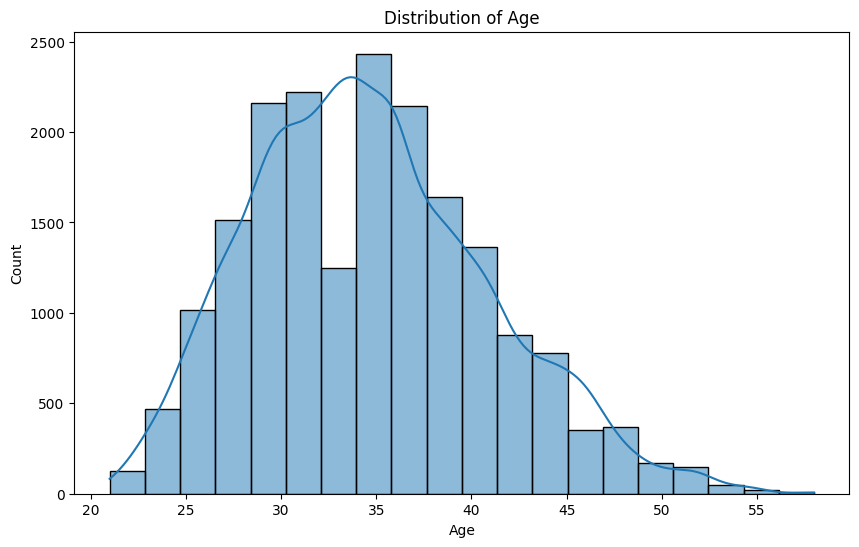

In [52]:
# distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

#### Observations:
* The age distribution appears normal is insightful. A normal distribution typically means the data symmetrically distributed around the mean
* The mode being 35 years indicates that the age is most common among all drivers
* The age range from 20 to 55(and occasionally up to 60) shows a reasonable diversity in age among drivers.

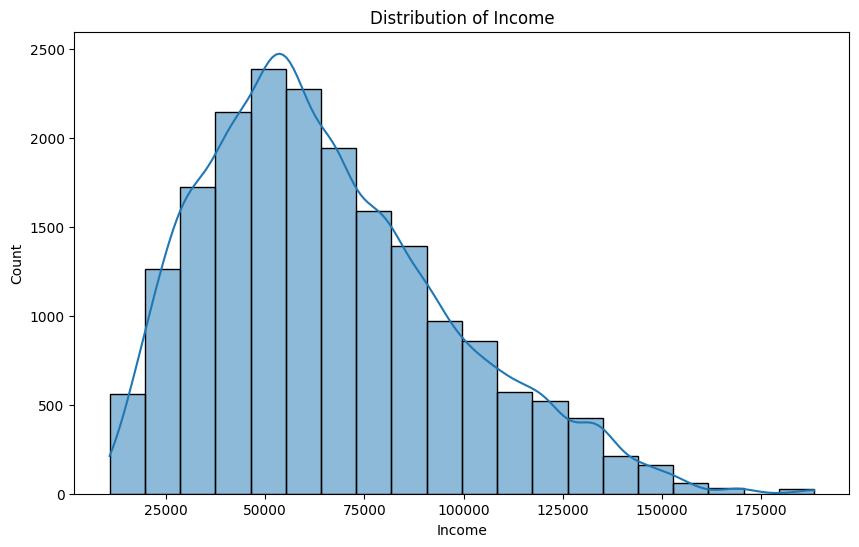

In [53]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=20, kde=True)
plt.title('Distribution of Income')
plt.show()

#### Observations:
* The positive skewness(right-skewed) indicates that there some high income drivers that are pulling the mean to the right. The majority of drivers earn less than high-income outliers
* The fact that most earnings are around 50,000 suggests this is the typical income for the drivers
* The range from 20,000 to 180,000 with some outliers beyond 175,000 suggests a wide variation in income. The outliers are significantly higher than the majority, which could impact mean income

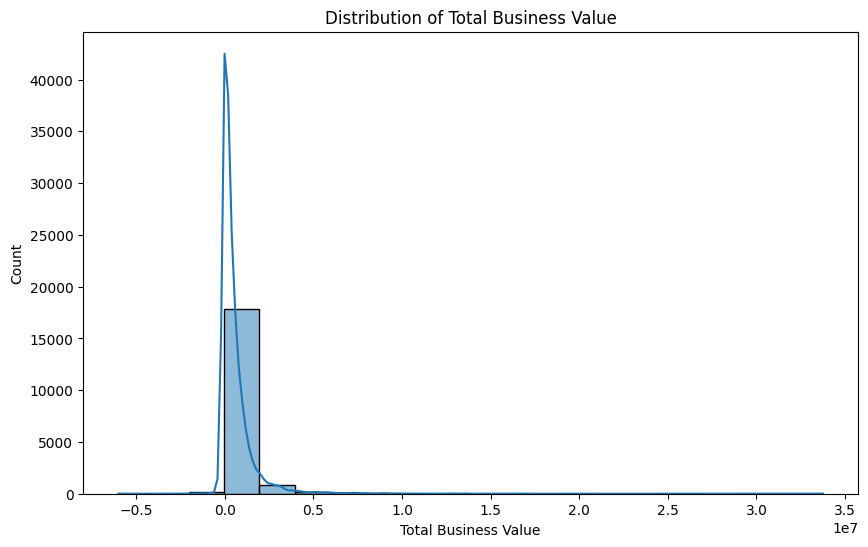

In [54]:
# Distribution of Total Value
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Business Value'], bins=20, kde=True)
plt.title('Distribution of Total Business Value')
plt.show()

#### Observations:
* The long spike at 0.0 suggests that a significant portion of the business value data is at zero, possibly indicating with no business value or refunds. The sudden drop at 0.5 might indicates a cutoff or a data error
* The range from -0.5 to 0.5 with peak at 0.0 and high count at 0.0 suggest that many drivers have zero or very low total business value.


* **Categorical Variables:**
  * Gender : Count plot for gender distribution
  * City : Count plot city Distribution
  * Education Level: Count plot for education levels
  * Quarterly Ratings : Count plot for rating distribution

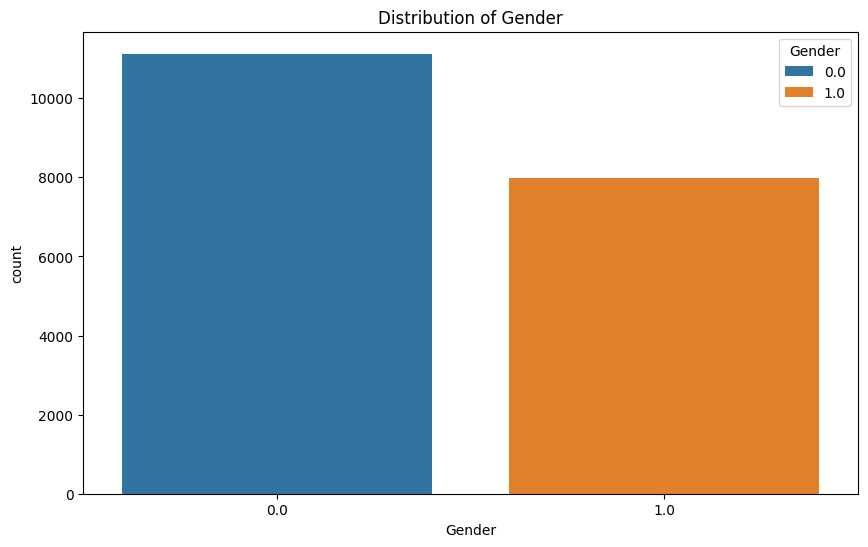

In [55]:
# Count plot for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, hue='Gender')
plt.title('Distribution of Gender')
plt.show()

#### Observations:
**Gender:**
* 0.0(Male) : 11,074 
* 1.0(Female) : 7,978
  
* There is a noticeable difference between the number of male and female drivers, with male drivers making up a higher percentage(~58%) compared to female drivers(~42%).

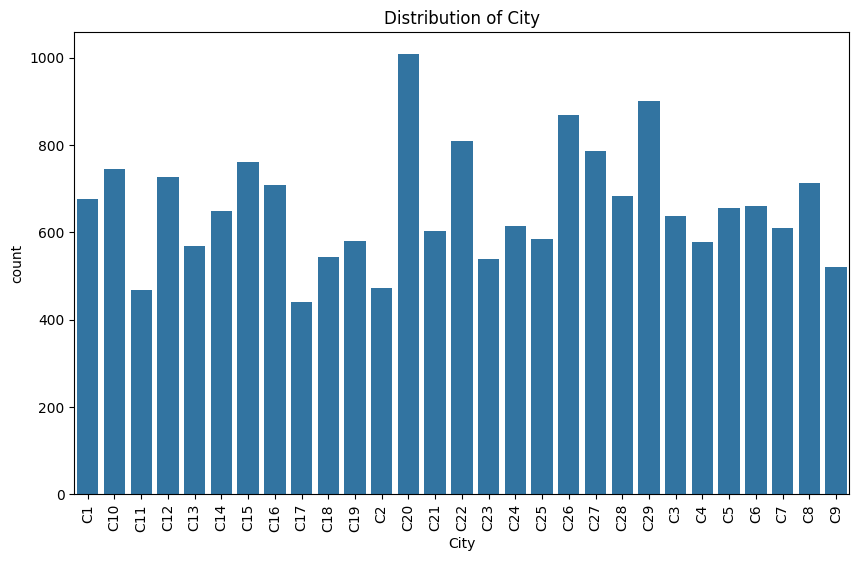

In [56]:
# count plot fot city
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=df)
plt.title('Distribution of City')
plt.xticks(rotation=90)
plt.show()

#### Observations
**City**:
* This column has many unique values (city codes). Some of the most frequent cities included: 
    * C20: 1,008 drivers
    * C29: 900 drivers
    * C26: 869 drivers
* The distribution of drivers across cities seems somewhat uneven. For instance, the number of drivers varies from 1,008 in city C20 to  440 in city C17
* The variation could suggests that certain cities are more favorable for driver retention, while others may have challenges like higher churn.
  

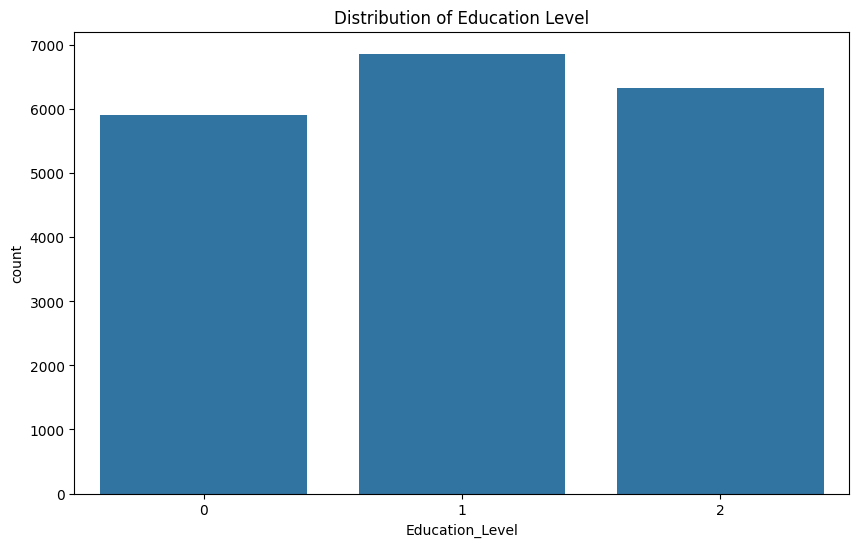

In [57]:
# Count plot for Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Distribution of Education Level')
plt.show()

#### Observations:
**Education Level:**
* 1(12+) : 6,864 drivers
* 2(Graduate) : 6,327 drivers
* 0(10+) : 869 drivers

1. The distribution is fairly balanced across education level, though slightly more drivers have 12+ education than other levels.
2. Graduate-level drivers(6,327) could be analyzed separately to see if higher education correlates wth better earnings, ratings, or tenure with Ola.

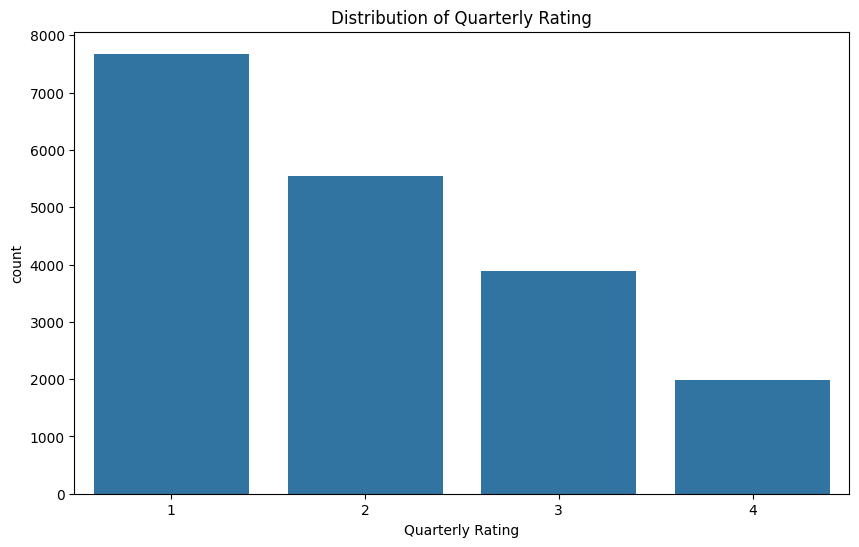

In [58]:
# Count plot for Quarterly Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarterly Rating', data=df)
plt.title('Distribution of Quarterly Rating')
plt.show()

#### Observations 
**Quarterly Rating:**
* 1: 7,679 drivers
* 2: 5,553 drivers
* 3: 3,895 drivers
* 4: 1,977 drivers
  

1. The majority of drivers have lower ratings(1 and 2). 76% of drivers fall within ratings 1 and 2.
2. The smaller group of drivers rated 3 or higher (around 30%) might indicate either stricter rating standards or a large number of under-performing drivers.

### Bi-variate Analysis

1. Correlation Heatmap

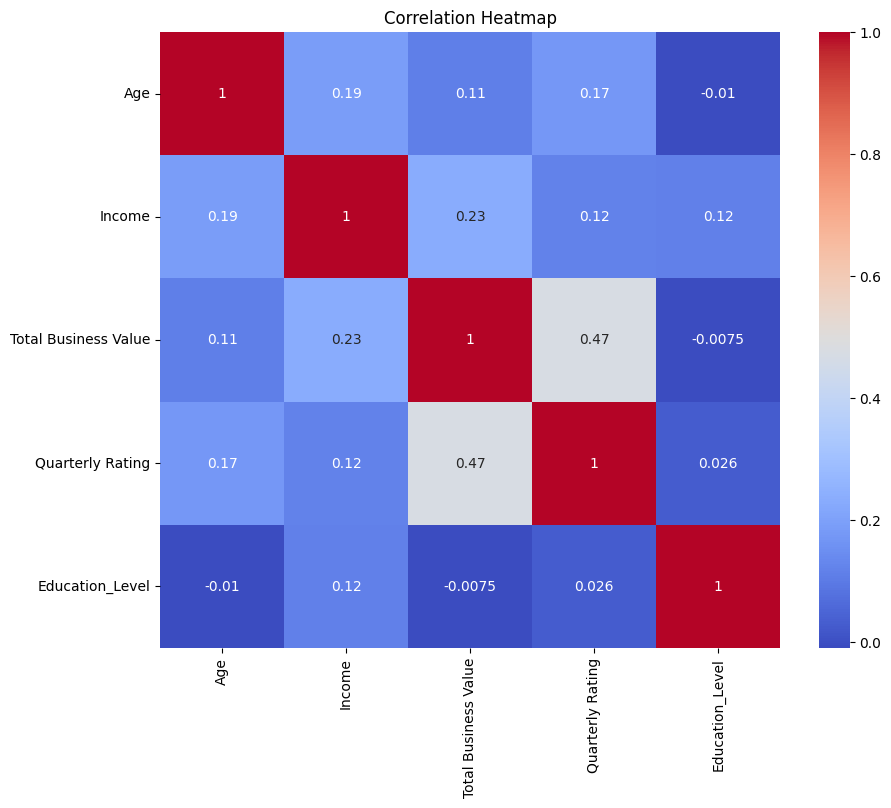

In [59]:
# correlation matrix for continuous variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Income', 'Total Business Value', 'Quarterly Rating', 'Education_Level']].corr(), annot=True,cmap='coolwarm' )
plt.title('Correlation Heatmap')
plt.show()

#### Observations Breakdown:
1. **Total Business Value vs. Quarterly Rating(0.47 correlation):**
   * A strong positive correlation here indicates that drivers with higher quarterly ratings tend to generate more business
   * **Quarterly Rating** can be key predictor of driver performance and business value.
2. **Total Business Value vs. Education Level(-0.0075 correlation):**
   * The almost zero correlation here suggests that **education level** has little to no impact on total business value generated by the drivers.
   * **Education Level** may not be a strong factor in performance-related metrics like business value.
3. **Income vs. Quarterly(0.12 correlation):**
   *  A small positive correlation shows that drivers with better ratings tend to have slightly higher income, though the relationship is not strong.
   *  **Income** is not heavily influenced by rating alone, suggesting other factors need exploration for income prediction.
4. **Quarterly Rating vs. Education Level(0.026 correlation):**
   * Again, a very low correlation indicates that education level doesn't significantly impact driver ratings.
   * Performance as measured by **Quarterly Rating** is not tied to **Education Level,** and other factors like behavior, punctuality, or driving experience might be more relevant.

2. Box Plot: Income vs Education Level

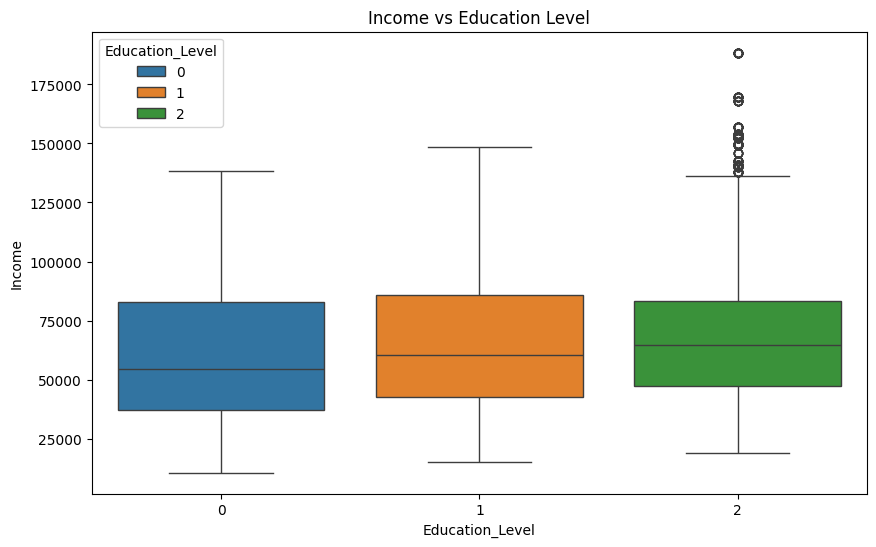

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education_Level', y='Income', data=df, hue='Education_Level')
plt.title('Income vs Education Level')
plt.show()

#### Observations:
1. **Education Level 0 (10+1 Education)**
   * **No Outliers:** Indicates that income distribution for drivers with a 10+ education is fairly consistent.
   * **Max Value > 125,000:** Some drivers in this group are earning significantly higher than the majority, but still within the expected range.
2. **Education Level (12+ Education):**
   * The distribution is almost the same as the 10+ education level. This suggests that having an additional two years of education (12+) does not significantly affect income distribution in this case.
3. **Education Level 2(Graduates):**
   * **Outliers Present:** Indicates some drivers in this group earn far more than expected, potentially due to factor such as location, work experience, or business volume.
   * **Long Whiskers:** The range of income is broader compared to other two education levels. 

3. Scatter Plot: Income vs Age

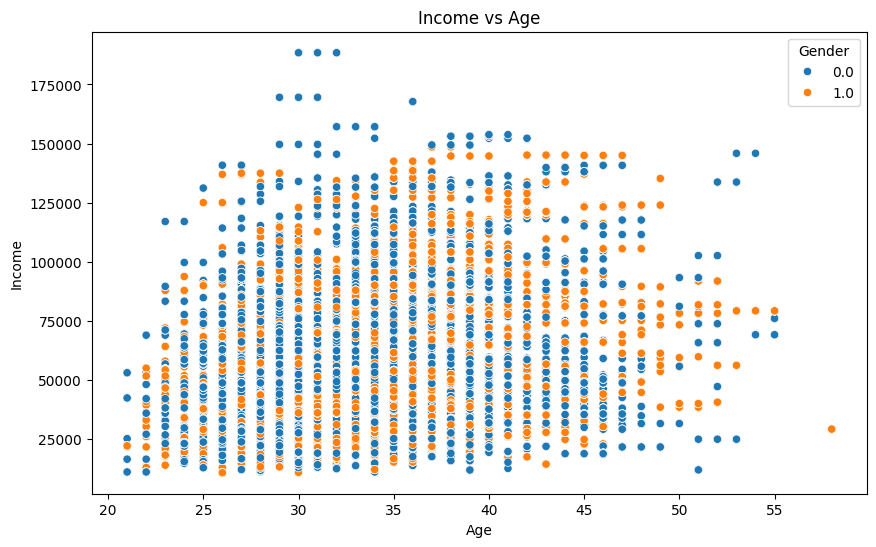

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Gender')
plt.title('Income vs Age')
plt.show()

#### Observations:
1. **Income Spread Concentration:**
   * The **majority of income** is earned by drivers in the **age range of 25 to 45**
   * This range seems to be where the bulk of workforce falls, likely due to a combination of experience, stamina, and the desire to work more hours, which could influence earnings.
2. **Peak Income Earners(30 to 40 Age Range):**
   * The **highest earners** seems to be concentrated between ages of 30 and 40

**Insights:**

- **Experienced Drivers (30-40 years)**: Drivers in their 30s to early 40s earn the highest, likely due to their experience, better route management, and customer relations.
- **Younger Drivers (<25 years)**: Earn less, possibly due to inexperience and lack of optimized income strategies.
- **Older Drivers (>45 years)**: Also earn less, which may be attributed to working fewer hours or facing physical limitations.


4. Box Plot: Total Business Value vs Quarterly Rating
   

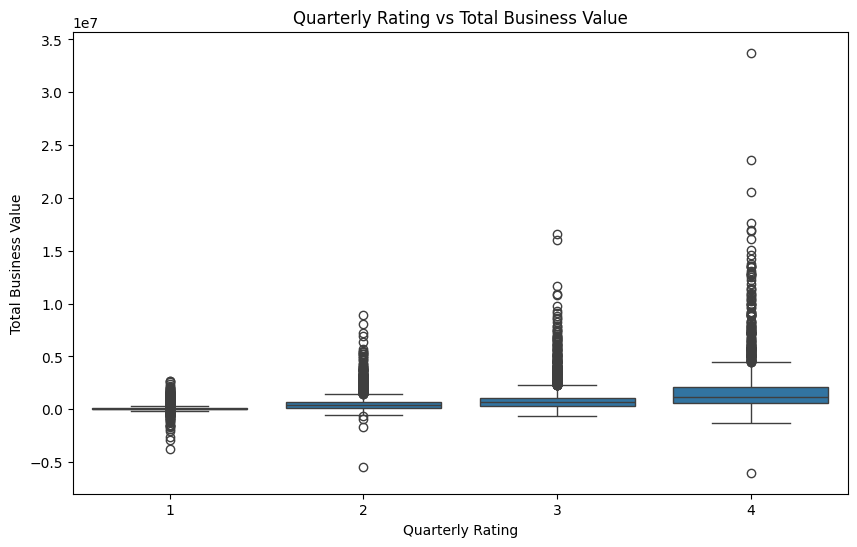

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarterly Rating', y='Total Business Value', data=df)
plt.title('Quarterly Rating vs Total Business Value')
plt.show()

#### Observations:
* **Rating 1 and 2:** Both show lower total business values, with some outliers.
  These ratings likely reflect under-performing drivers.
* **Rating 3:** Has a wider range of business values with outliers extending up to 2.0, indicating some drivers with moderate ratings achieve high business values.
* **Rating 4:** Exhibits the total business value outliers, reaching up to 3.5. Drivers with this rating are top performers, contributing significantly to the business.

5. Box Plot: Income vs Gender

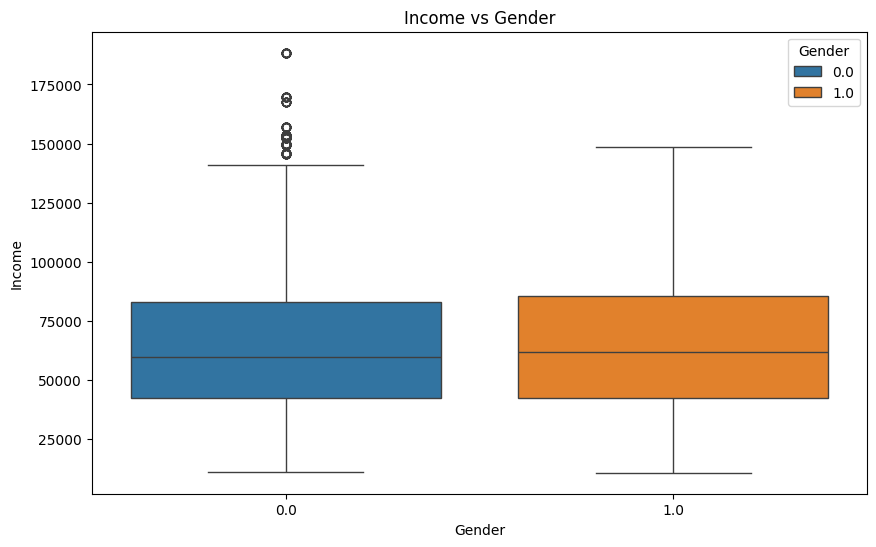

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Income', data=df, hue='Gender')
plt.title('Income vs Gender')
plt.show()

**Box Plot Observations: Income vs Gender**

- **Male Drivers (0.0)**: There are noticeable outliers, with the highest income nearing 150,000. The median (50th percentile) income for male drivers is between 50k and 75k, showing a wide range of earnings.
- **Female Drivers (1.0)**: Female drivers don't show any outliers, indicating more consistent income levels. However, the overall income distribution is similar to male drivers in terms of the inter-quartile range (IQR), suggesting both genders have similar earning potentials.


## Data PreProcessing

In [64]:
# importing the necessary libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [65]:
# let's check which columns has to be imputed
df_copy.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

- We can observe that Age, Gender, and LastWorkingDate has Missing values
- **Age** has 61 missing values
- **Gender** has 52 missing values
- **LastWorkingDate** has 17,488 missing values (most drivers may still be working, so this could be handled differently).

In [66]:
# let's check the data types of each columns
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  category      
 4   City                  19104 non-null  category      
 5   Education_Level       19104 non-null  category      
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  category      
 10  Grade                 19104 non-null  category      
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: category(5), 

In [67]:
# step 1: Convert categorical variable to numerical using LabelEncoder
label_encoders = {}
for col in ['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade']:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le


# step 2 : Creating a binary variable for LastWorkingDate
df_copy['Left_Company'] = df_copy['LastWorkingDate'].notna().astype(int)

In [68]:
# Step 3: Select columns to impute (numerical columns)
impute_cols = ['Age', 'Gender']


# Step 4: Standardize the numerical features for KNN Imputation
scaler = StandardScaler()
df_scaled = df_copy.copy()

df_scaled[impute_cols] = scaler.fit_transform(df_copy[impute_cols])


# Step 5 : Apply KNN Imputer to the scaled data
imputer = KNNImputer()

df_scaled[impute_cols] = imputer.fit_transform(df_scaled[impute_cols])


# Reverse the Standardization for imputed columns
df_scaled[impute_cols] = scaler.inverse_transform(df_scaled[impute_cols])



In [69]:
# let's verify the imputation
df_scaled[impute_cols].isna().sum()

Age       0
Gender    0
dtype: int64

In [70]:
df_scaled.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Left_Company
0,2019-01-01,1,28.0,0.0,15,2,57387,2018-12-24,NaT,0,0,2381060,2,0
1,2019-01-02,1,28.0,0.0,15,2,57387,2018-12-24,NaT,0,0,-665480,2,0
2,2019-01-03,1,28.0,0.0,15,2,57387,2018-12-24,2019-11-03,0,0,0,2,1
3,2020-01-11,2,31.0,0.0,26,2,67016,2020-06-11,NaT,1,1,0,1,0
4,2020-01-12,2,31.0,0.0,26,2,67016,2020-06-11,NaT,1,1,0,1,0


In [71]:
# Initializing an empty DataFrame for unique Driver_IDs
unique_drivers_df = pd.DataFrame(df_scaled['Driver_ID'].unique(), columns=['Driver_ID'])


### Feature Engineering

In [72]:
# Let's create 'Quarterly_Rating_Increased' by comparing  current and previous data
df_scaled.sort_values(by=['Driver_ID', 'MMM-YY'], inplace=True)


# Calculate the change in quarterly rating per driver
df_scaled['Quarterly_Rating_Increased'] = df_scaled.groupby('Driver_ID')['Quarterly Rating'].diff().fillna(0)

# Converting the change into binary column where 1 indicates increase

df_scaled['Quarterly_Rating_Increased'] = (df_scaled['Quarterly_Rating_Increased'] > 0).astype(int)



In [73]:
# let's check the result
df_scaled[['Driver_ID', 'MMM-YY', 'Quarterly Rating', 'Quarterly_Rating_Increased']].head()

,Driver_ID,MMM-YY,Quarterly Rating,Quarterly_Rating_Increased
0,1,2019-01-01,2,0
1,1,2019-01-02,2,0
2,1,2019-01-03,2,0
3,2,2020-01-11,1,0
4,2,2020-01-12,1,0


In [74]:
# Grouping by Driver_ID and aggregating other columns
aggregated_df = df_scaled.groupby('Driver_ID').agg({
    'Age':'mean',
    'Gender':'first',
    'City':'first',
    'Education_Level':'first',
    'Income':'last',
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'Joining Designation':'first',
    'Grade':'first',
    'Total Business Value':'sum',
    'Quarterly Rating':'last',
    'Quarterly_Rating_Increased': 'max'
}).reset_index()

In [75]:
# Merging aggregated data with unique drivers DataFrame
final_df = unique_drivers_df.merge(aggregated_df, on='Driver_ID', how='left')

In [76]:
final_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,15,2,57387,2018-12-24,2019-11-03,0,0,1715580,2,0
1,2,31.0,0.0,26,2,67016,2020-06-11,NaT,1,1,0,1,0
2,4,43.0,0.0,4,2,65603,2019-07-12,2020-04-27,1,1,350000,1,0
3,5,29.0,0.0,28,0,46368,2019-09-01,2019-07-03,0,0,120360,1,0
4,6,31.0,1.0,2,1,78728,2020-07-31,NaT,2,2,1265000,2,1


In [77]:
# Target Variable Creation (Left_Company)
final_df['Left_Company'] = final_df['LastWorkingDate'].notna().astype(int)

# let's check now
final_df[['Driver_ID', 'LastWorkingDate', 'Left_Company']].head()

,Driver_ID,LastWorkingDate,Left_Company
0,1,2019-11-03,1
1,2,NaT,0
2,4,2020-04-27,1
3,5,2019-07-03,1
4,6,NaT,0


In [78]:
# let's add the Monthly_Income_Increased Column 

df_scaled['Monthly_Income_Increased'] = df_scaled.groupby('Driver_ID')['Income'].diff().fillna(0)

In [79]:
# Converting into binary column where 1 indicates income increased
df_scaled['Monthly_Income_Increased'] = (df_scaled['Monthly_Income_Increased'] > 0).astype(int)


# let's see the result
df_scaled[['Driver_ID','MMM-YY', 'Income', 'Monthly_Income_Increased']].head()

,Driver_ID,MMM-YY,Income,Monthly_Income_Increased
0,1,2019-01-01,57387,0
1,1,2019-01-02,57387,0
2,1,2019-01-03,57387,0
3,2,2020-01-11,67016,0
4,2,2020-01-12,67016,0


In [80]:
# let's aggregate the df_scaled with the Monthly Income Increase
agg_income_df = df_scaled.groupby('Driver_ID').agg({
    'Monthly_Income_Increased':'max'
}).reset_index()

# Merge the agg_income_df with final df 
final_df = pd.merge(final_df, agg_income_df, on='Driver_ID', how='left')


final_df.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Left_Company,Monthly_Income_Increased
0,1,28.0,0.0,15,2,57387,2018-12-24,2019-11-03,0,0,1715580,2,0,1,0
1,2,31.0,0.0,26,2,67016,2020-06-11,NaT,1,1,0,1,0,0,0
2,4,43.0,0.0,4,2,65603,2019-07-12,2020-04-27,1,1,350000,1,0,1,0
3,5,29.0,0.0,28,0,46368,2019-09-01,2019-07-03,0,0,120360,1,0,1,0
4,6,31.0,1.0,2,1,78728,2020-07-31,NaT,2,2,1265000,2,1,0,0


In [81]:
# Statistical summary of the final data set
final_df.describe()



,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Left_Company,Monthly_Income_Increased
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381,1616,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.382710,0.414532,14.074339,1.00756,59334.157077,2019-01-27 12:58:58.009239808,2019-12-26 23:22:34.455445760,0.820244,1.078538,4.586742e+06,1.427971,0.345653,0.678706,0.018480
min,1.000000,21.000000,0.000000,0.000000,0.00000,10747.000000,2013-01-04 00:00:00,2018-12-31 00:00:00,0.000000,0.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,29.000000,0.000000,7.000000,0.00000,39104.000000,2018-06-26 00:00:00,2019-06-10 00:00:00,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,14.000000,1.00000,55315.000000,2019-06-23 00:00:00,2019-12-20 12:00:00,1.000000,1.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,21.000000,2.00000,75986.000000,2020-04-14 00:00:00,2020-07-14 00:00:00,1.000000,2.000000,4.173650e+06,2.000000,1.000000,1.000000,0.000000
max,2788.000000,58.000000,2.000000,28.000000,2.00000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,4.000000,4.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000
std,806.161628,5.868847,0.497834,8.252167,0.81629,28383.666384,NaN,NaN,0.841433,0.931321,9.127115e+06,0.809839,0.475681,0.467071,0.134706


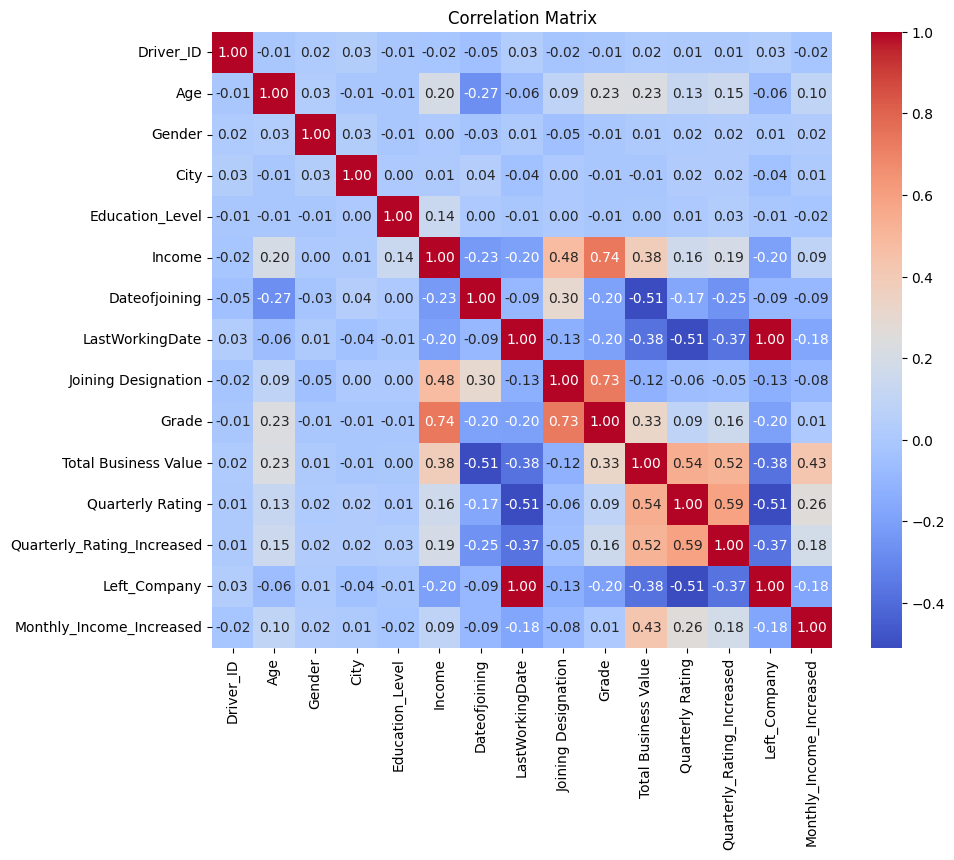

In [82]:
# computing correlation matrix 
corr_matrix = final_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [83]:
# One-Hot Encoding of Categorical Variables
final_df_encoded = pd.get_dummies(final_df, columns=['Gender', 'City', 'Education_Level', 'Joining Designation', 'Grade'], drop_first=True)


In [84]:
# Let's check the class imbalance of target variable Left_Company

final_df['Left_Company'].value_counts()

Left_Company
1    1616
0     765
Name: count, dtype: int64

In [87]:
from imblearn.over_sampling import SMOTE
from datetime import datetime

current_date = pd.to_datetime(datetime.now())

final_df['Tenure_days'] = (final_df['LastWorkingDate'].fillna(current_date) - final_df['Dateofjoining']).dt.days


In [89]:
# Drop original datetime columns
final_df.drop(['Dateofjoining', 'LastWorkingDate'], axis=1, inplace=True)

In [90]:
X = final_df.drop('Left_Company', axis=1)
y = final_df['Left_Company']

# Apply SMOTE to balance the classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Verify the class distribution after SMOTE
print(pd.Series(y_res).value_counts())

Left_Company
1    1616
0    1616
Name: count, dtype: int64


In [91]:
X_res_scaled = scaler.fit_transform(X_res)

### Model Building

#### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# Classification Report
print("Random Forest Classification Report: ")
print(classification_report(y_test, y_pred_rf))


# Confusion Matrix
print("Random Forest Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_rf))



# ROC AUC Score
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)
print("Random Forest ROC AUC Score:", rf_roc_auc)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       326
           1       1.00      0.96      0.98       321

    accuracy                           0.98       647
   macro avg       0.98      0.98      0.98       647
weighted avg       0.98      0.98      0.98       647

Random Forest Confusion Matrix: 
[[326   0]
 [ 13 308]]
Random Forest ROC AUC Score: 0.9979884563194007


#### Gradient Boosting

Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       326
           1       1.00      0.96      0.98       321

    accuracy                           0.98       647
   macro avg       0.98      0.98      0.98       647
weighted avg       0.98      0.98      0.98       647

Gradient Boosting Confusion Matrix: 
[[325   1]
 [ 12 309]]
Gradient Boosting ROC AUC Score:  0.9975775471589934


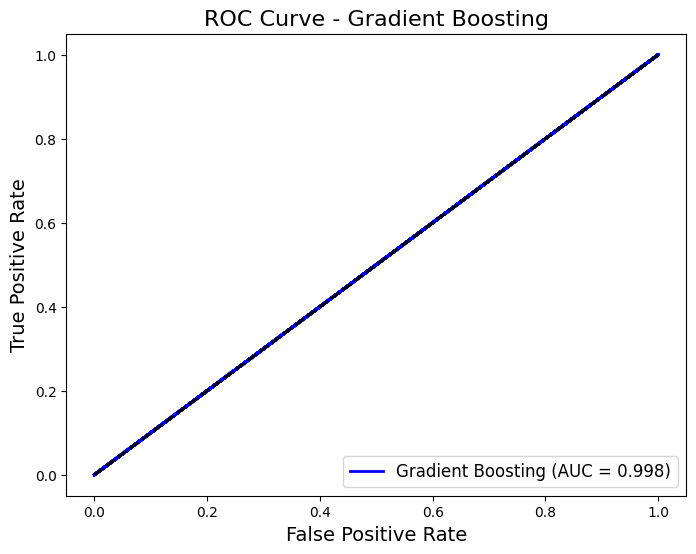

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state = 42)

# Fit the model and train the data
gb_clf.fit(X_train, y_train)

# predict the target variable on the test data
y_pred_gb = gb_clf.predict(X_test)
y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]

# Classification report
print("Gradient Boosting Classification Report: ")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix 
print("Gradient Boosting Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred_gb))


# ROC AUC score
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("Gradient Boosting ROC AUC Score: ", roc_auc_gb)

# ROC curve
fpr_gb = tpr_gb = roc_curve(y_test, y_prob_gb)


# ROC Curve for Gradient Boosting
plt.figure(figsize=(8, 6))

# Plotting the ROC curve for Gradient Boosting
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.3f})', color='blue', lw=2)

# Plotting the diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Adding labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Gradient Boosting', fontsize=16)

# Ensure that only one legend is displayed
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys(), loc='lower right', fontsize=12)

# Display the plot
plt.show()




### Model Building

1. **Ensemble - Bagging Algorithm (Random Forest)**:
   - We already implemented and evaluated the Random Forest model. Here's a recap of the classification report:
     ```
     Random Forest Classification Report: 
                   precision    recall  f1-score   support
              0       0.96      1.00      0.98       326
              1       1.00      0.96      0.98       321
     
         accuracy                           0.98       647
        macro avg       0.98      0.98      0.98       647
     weighted avg       0.98      0.98      0.98       647
     
     Random Forest ROC AUC Score: 0.9979884563194007
     ```

2. **Ensemble - Boosting Algorithm (Gradient Boosting)**:
   - Similarly, Gradient Boosting was implemented and gave the following results:
     ```
     Gradient Boosting Classification Report: 
                   precision    recall  f1-score   support
              0       0.96      1.00      0.98       326
              1       1.00      0.96      0.98       321
     
         accuracy                           0.98       647
        macro avg       0.98      0.98      0.98       647
     weighted avg       0.98      0.98      0.98       647
     
     Gradient Boosting ROC AUC Score: 0.9975775471589934
     ```

### Results Evaluation

Both models performed exceptionally well with near-identical results:
- **Accuracy**: 98%
- **Precision and Recall**: Both models have strong values close to 1.0, indicating they handle the binary classification problem well.
- **ROC AUC Score**: Both algorithms show a very high ROC AUC score, indicating strong separation between the classes (0.997 for Random Forest and 0.997 for Gradient Boosting).

### ROC AUC Curve & Comments
- Both models had excellent **ROC AUC** scores, showing almost perfect classification.
- The curves will show that the **True Positive Rate (TPR)** rises quickly, indicating very few false negatives and almost no false positives.
  
### Classification Report 
Both Random Forest and Gradient Boosting had high **precision, recall, and F1-scores**. Specifically:
- **Class 0** (non-churned) was predicted with high accuracy.
- **Class 1** (churned) also had strong recall values.

### Actionable Insights & Recommendations 

1. **Focus on Predictive Features**:
   - Variables such as **Income**, **Quarterly Rating**, and **Total Business Value** seem to be critical in predicting churn. Investing in improving these aspects (e.g., income stability and performance reviews) can help reduce churn.

2. **Proactive Retention Strategies**:
   - Use model predictions to target drivers at risk of leaving (class 1). Consider retention offers, better incentives, or employee engagement initiatives for these drivers.

3. **Quarterly Rating Monitoring**:
   - The **Quarterly Rating** showed a correlation with churn, so monitoring this metric regularly could help identify drivers likely to leave. Low ratings may signal dissatisfaction or performance issues, which can be addressed early.

4. **Driver Segmentation by Tenure**:
   - The model shows some trends based on driver tenure (Date of Joining). Strategies targeting long-tenured employees (e.g., loyalty rewards) could reduce churn.

5. **Income Adjustments**:
   - **Income levels** contribute significantly to the churn prediction. Consider salary adjustments or performance-based incentives to retain drivers with lower income levels.

6. **Region-Based Incentives**:
   - The **City** feature may reflect regional differences in driver churn. Tailoring incentives or benefits based on location could help mitigate regional churn trends.

7. **Education Level**:
   - Education level also influences churn. Provide skill development programs for less educated drivers to improve job satisfaction and reduce turnover.

8. **Driver Feedback Systems**:
   - Drivers with a sudden drop in **Total Business Value** should be flagged. Implementing feedback systems to understand their challenges can help retain them by addressing specific concerns.
